# 1. Importing and Understanding the Dataset
**Dataset**: IMDB Dataset of top 1000 movies and tv shows.

**Column name Description**

* Poster_Link - Link of the poster that imdb using
* Series_Title = Name of the movie
* Released_Year - Year at which that movie released
* Certificate - Certificate earned by that movie
* Runtime - Total runtime of the movie
* Genre - Genre of the movie
* IMDB_Rating - Rating of the movie at IMDB site
* Overview - mini story/ summary
* Meta_score - Score earned by the movie
* Director - Name of the Director
* Star1,Star2,Star3,Star4 - Name of the Stars
* No_of_votes - Total number of votes

**Importing the necessary module**

In [1]:
import pandas as pd
import numpy as np

In [2]:
#LOADING THE DATASET
data = pd.read_csv("/kaggle/input/movie-database-analysis/imdb_top_1000.csv")
data.head(2)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"


**Initial steps involve:**

1. Importing csv file by utilising pandas library and .read_csv() method
2. The file will get converted into the Dataframe
3. By deploying various methods and attributes, we can retrieve useful information about the dataset for better understanding

In [3]:
# Checking null values present and Datatype of each column 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


# 2.Data Preparation and Cleaning

**droping  the unwanted column**

In [4]:
data = data.drop(['Poster_Link','Meta_score'],axis=1)
data.head(2)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"


*check the number of missing values (NaN) in each column of our DataFrame*

In [5]:
data.isna().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

**remove rows where the 'Gross' column contains NaN (missing) values.**

In [6]:
data =data[data['Gross'].isna()==False]

**renaming data column**

In [7]:
data.rename(columns={'Released_Year':'Release Year', 
             'Certificate':'Age Rating', 
             'IMDB_Rating':'IMDB Rating',
             'No_of_Votes':'Votes',
             'Gross':'Gross Revenue'}, inplace=True)

**consolidating different age ratings into three main categories: 'U' (Universal), 'UA' (Universal - Adult), and 'A' (Adult).**

In [8]:
data['Age Rating'] = data['Age Rating'].map({'U':'U','G':'U','PG':'U','GP':'U','TV-PG':'U',
                                             'UA':'UA','PG-13':'UA','U/A':'UA','Passed':'UA','Approved':'UA',
                                             'A':'A','R':'A'})
data = data[data['Age Rating'].isna() == False]
data['Age Rating'].value_counts()

Age Rating
A     315
U     237
UA    232
Name: count, dtype: int64

In [9]:
data

,Series_Title,Release Year,Age Rating,Runtime,Genre,IMDB Rating,Overview,Director,Star1,Star2,Star3,Star4,Votes,Gross Revenue
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,Giù la testa,1971,U,157 min,"Drama, War, Western",7.6,A low-life bandit and an I.R.A. explosives exp...,Sergio Leone,Rod Steiger,James Coburn,Romolo Valli,Maria Monti,30144,"696,690"
991,Kelly's Heroes,1970,U,144 min,"Adventure, Comedy, War",7.6,A group of U.S. soldiers sneaks across enemy l...,Brian G. Hutton,Clint Eastwood,Telly Savalas,Don Rickles,Carroll O'Connor,45338,"1,378,435"
992,The Jungle Book,1967,U,78 min,"Animation, Adventure, Family",7.6,Bagheera the Panther and Baloo the Bear have a...,Wolfgang Reitherman,Phil Harris,Sebastian Cabot,Louis Prima,Bruce Reitherman,166409,"141,843,612"
994,A Hard Day's Night,1964,U,87 min,"Comedy, Music, Musical",7.6,"Over two ""typical"" days in the life of The Bea...",Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,"13,780,024"


In [10]:
#Filtering Release Year
year_format = r'\d\d\d\d'
data = data[data['Release Year'].str.match(year_format)].copy()

In [11]:
#Changing Release Year type to int
data['Release Year'] = data['Release Year'].astype(int)

# Changing Runtime type to int 
data['Runtime'] = data['Runtime'].str[:-4].astype(int)

In [12]:
#Changing Gross Revenue type to int
data['Gross Revenue'] = data['Gross Revenue'].str.replace(',','').astype(int)
data['Gross Revenue'] = data['Gross Revenue']*(10**-6)

In [13]:
#Grouping by Genre
top_Genres = data.groupby('Genre')[['IMDB Rating']].mean().sort_values('IMDB Rating',ascending=False).head(10).round(2)
top_Genres.reset_index(inplace=True)
top_Genres



,Genre,IMDB Rating
0,"Crime, Mystery, Thriller",8.40
1,"Horror, Sci-Fi",8.40
2,"Drama, Horror",8.40
3,"Action, Sci-Fi",8.40
4,"Drama, Mystery, War",8.35
5,Western,8.35
6,"Crime, Drama, Sci-Fi",8.30
7,"Adventure, Mystery, Thriller",8.30
8,"Comedy, Musical, Romance",8.30
9,"Mystery, Romance, Thriller",8.30


In [14]:
#summing up the occurrences of each genre after creating dummy variable
Genre = data['Genre'].str.get_dummies(sep=', ')
sum_of_generes = Genre.sum().sort_values(ascending=True)
sum_of_generes

Film-Noir      9
Musical       14
Western       16
Horror        18
Sport         19
Music         31
War           31
History       41
Family        46
Fantasy       56
Sci-Fi        59
Animation     66
Mystery       81
Biography     96
Romance      100
Thriller     104
Action       152
Crime        160
Adventure    167
Comedy       183
Drama        555
dtype: int64

In [15]:
print(data.isna().sum())
print(data.dtypes)

Series_Title     0
Release Year     0
Age Rating       0
Runtime          0
Genre            0
IMDB Rating      0
Overview         0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
Votes            0
Gross Revenue    0
dtype: int64
Series_Title      object
Release Year       int64
Age Rating        object
Runtime            int64
Genre             object
IMDB Rating      float64
Overview          object
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
Votes              int64
Gross Revenue    float64
dtype: object


# 3. Exploratory Analysis and Visualization

Visualization provides us liberty to find correlation between different columns of dataset in a comprehensive manner

Importing Matplotlib and Seaborn Libraries to visualise our data and to find correlations between different columns.

Matplotlib plots various graphs using Pandas and Numpy.
Seaborn is the extended version of Matplotlib, which uses Matplotlib, Numpy, and Pandas to plot graphs


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

**creating a horizontal bar chart to visualize the total counts of genres using matplotlib. ******

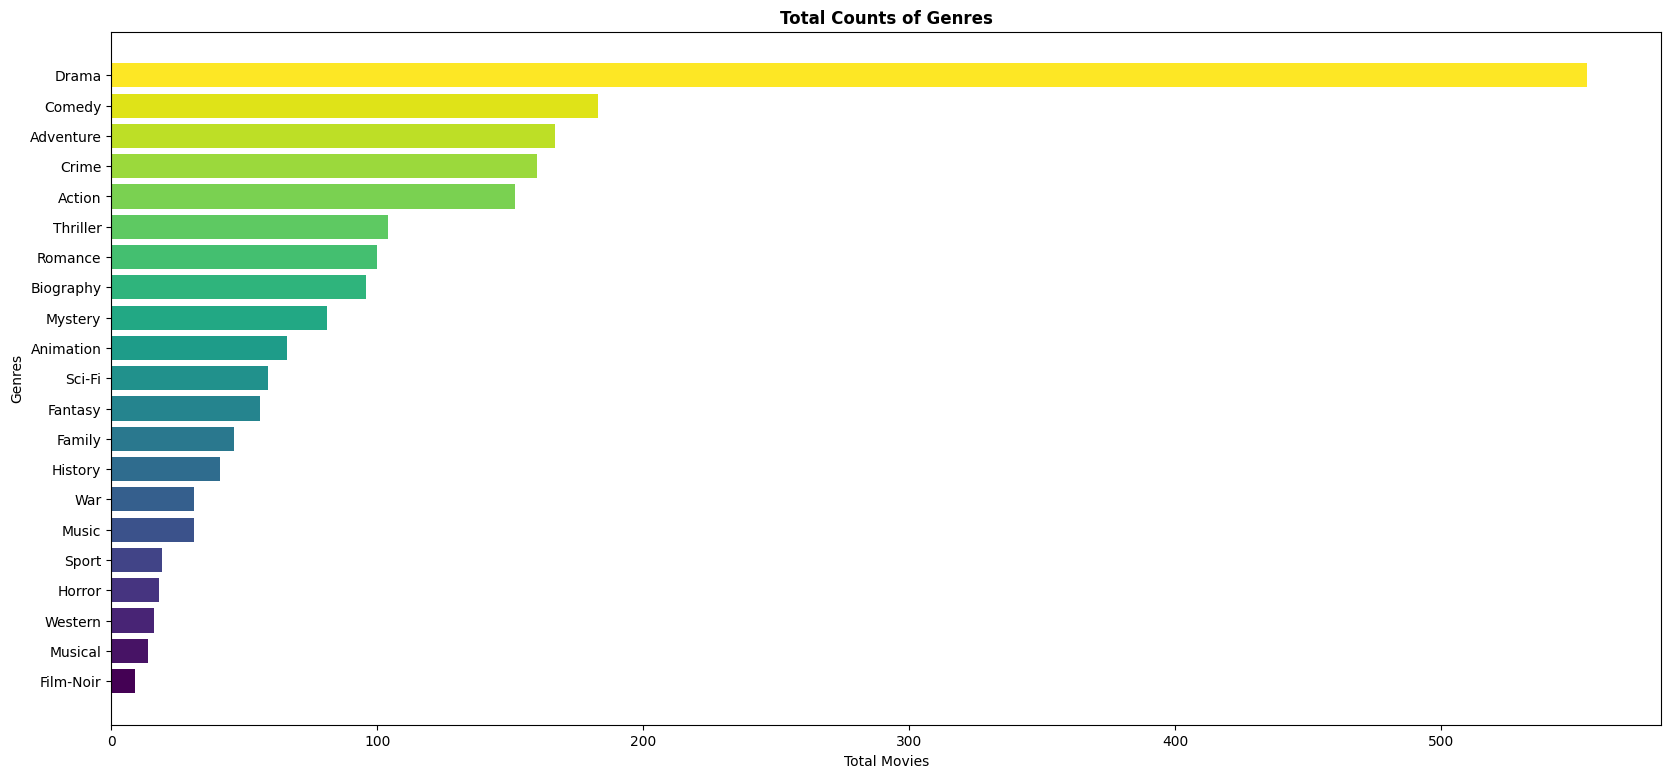

In [17]:
colors = plt.cm.viridis(np.linspace(0, 1, len(sum_of_generes)))
plt.figure(figsize=(20,9))
plt.barh(sum_of_generes.keys(),sum_of_generes,color=colors)
plt.title('Total Counts of Genres', fontsize=12, weight=600)
plt.xlabel('Total Movies')
plt.ylabel('Genres')
plt.show()

Total Released movies by Date

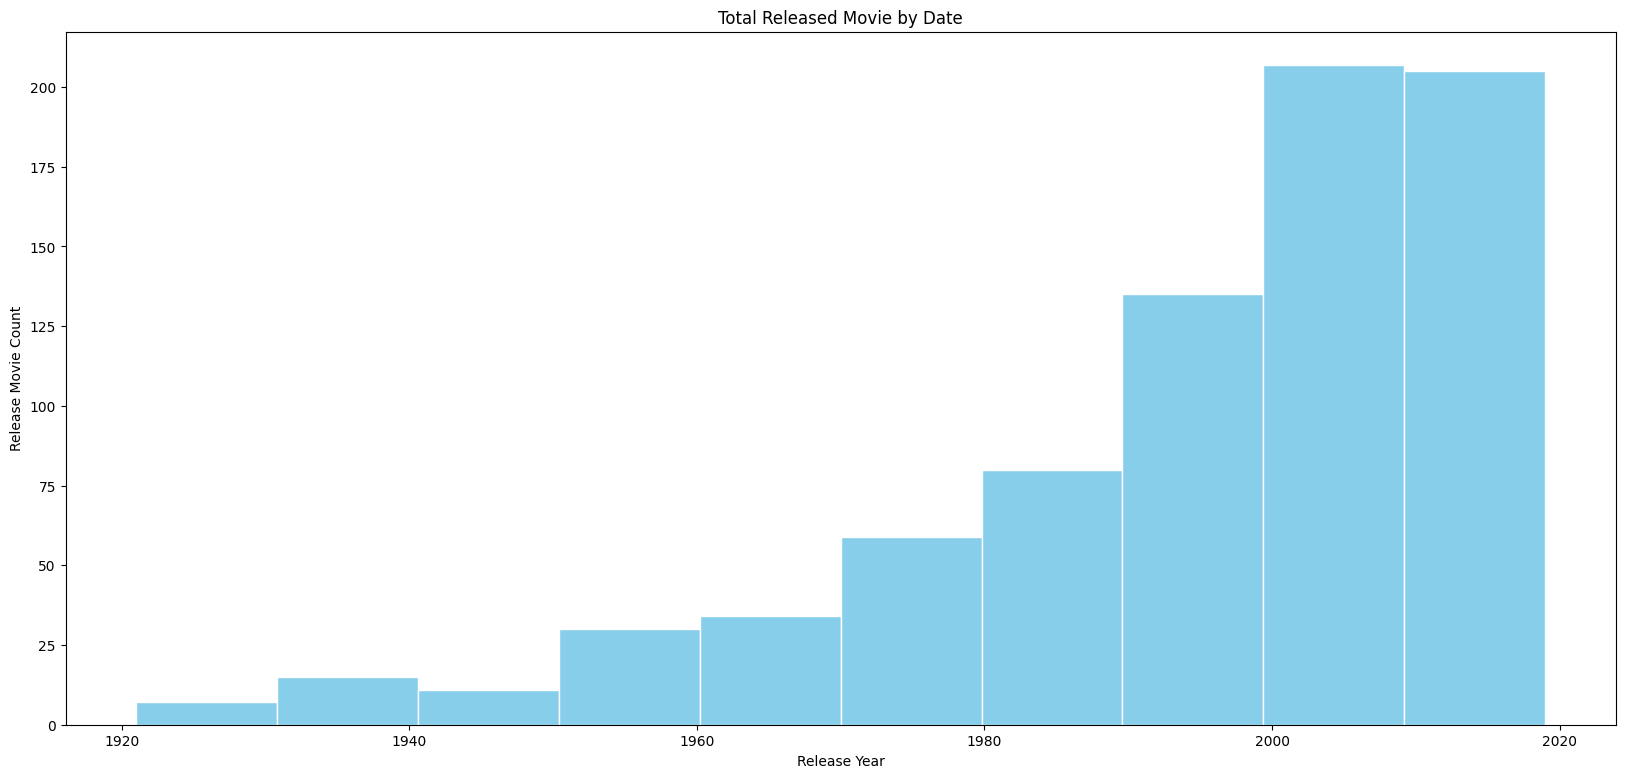

In [18]:
plt.figure(figsize=(20,9))
plt.hist(data['Release Year'],color='skyblue', edgecolor='white')
plt.xlabel('Release Year')
plt.ylabel('Release Movie Count')
plt.title('Total Released Movie by Date')
plt.show()

****creates a bar chart to visualize the top 10 movies based on their gross revenue. ****

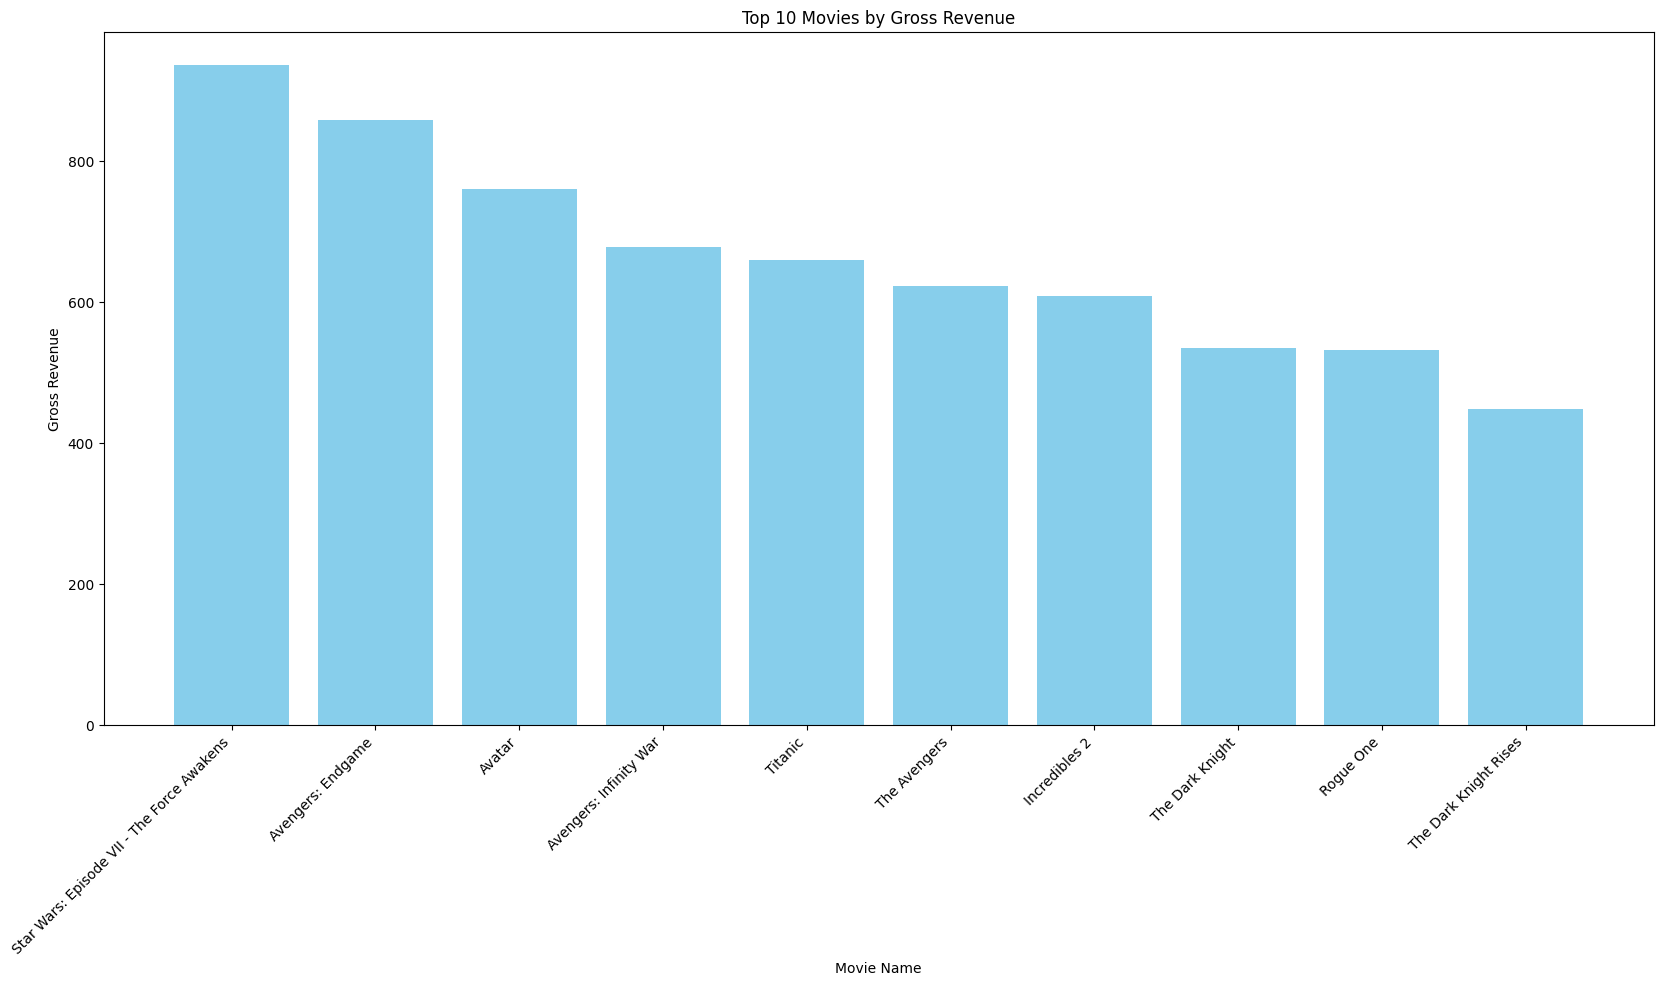

In [19]:
plt.figure(figsize=(20,9))
top_10_movies = data.nlargest(10, 'Gross Revenue')
plt.bar(top_10_movies['Series_Title'], top_10_movies['Gross Revenue'], color='skyblue')
plt.xlabel('Movie Name')
plt.ylabel('Gross Revenue')
plt.title('Top 10 Movies by Gross Revenue')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')  
plt.show()

**How does the gross revenue of movies vary across different directors?**

In the bar plot visualization:

Each bar represents the total gross revenue generated by a director.

The directors are sorted in descending order based on their total gross revenue.

By examining the bar plot, we can identify the top directors in terms of gross revenue and compare their performance.

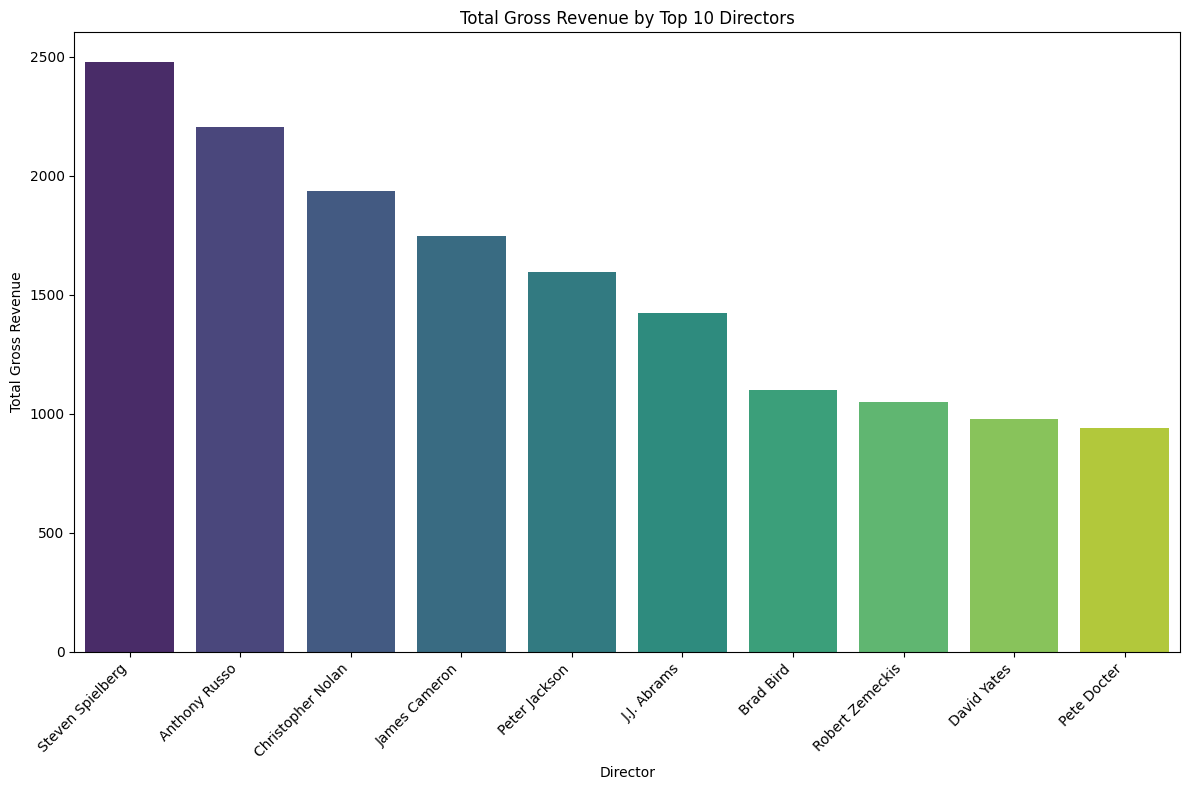

In [20]:
# Group the data by director and calculate the total gross revenue for each director
director_gross = data.groupby('Director')['Gross Revenue'].sum().sort_values(ascending=False)

# Visualize the distribution of gross revenue across different directors using a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=director_gross.index[:10], y=director_gross.values[:10], palette='viridis')
plt.title('Total Gross Revenue by Top 10 Directors')
plt.xlabel('Director')
plt.ylabel('Total Gross Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Is there a relationship between runtime and IMDb rating?**

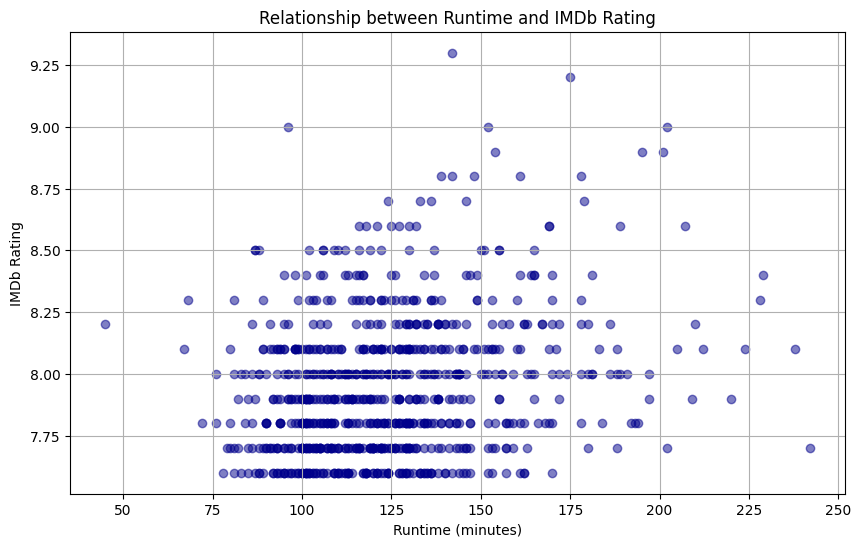

In [21]:
# Create a scatter plot to visualize the relationship between runtime and IMDb rating
plt.figure(figsize=(10, 6))
plt.scatter(data['Runtime'], data['IMDB Rating'], color='darkblue',alpha=0.5)
plt.title('Relationship between Runtime and IMDb Rating')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Rating')
plt.grid(True)
plt.show()

Yes there is a relationship between IMDb rating and runtime, particularly in the range of 100 to 200 minutes where IMDb rating tends to be higher, 

# 4. Asking and Answering Questions

**a. Which actors/actresses appear most frequently in the dataset?****

In [22]:
# Combine the 'Star' columns into a single Series
stars = pd.concat([data['Star1'], data['Star2'], data['Star3'], data['Star4']])

# Count the occurrences of each actor/actress
star_counts = stars.value_counts()

# Print the top 10 actors/actresses with the most appearances
print("Top 10 actors/actresses with the most appearances:")
print(star_counts.head(10))

Top 10 actors/actresses with the most appearances:
Robert De Niro       17
Tom Hanks            13
Al Pacino            13
Brad Pitt            12
Clint Eastwood       11
Christian Bale       11
Matt Damon           11
Leonardo DiCaprio    11
Johnny Depp           9
Denzel Washington     9
Name: count, dtype: int64


* concatenate the 'Star1', 'Star2', 'Star3', and 'Star4' columns into a single Series called stars.
* Then, we use the value_counts() function to count the occurrences of each actor/actress in the stars Series.
* Finally, we print the top 10 actors/actresses with the most appearances in the dataset.

**b. Find the total number of movies which are released in the year 2010**

In [23]:
movies_2010=data[data["Release Year"] == 2010]
movies_2010

,Series_Title,Release Year,Age Rating,Runtime,Genre,IMDB Rating,Overview,Director,Star1,Star2,Star3,Star4,Votes,Gross Revenue
8,Inception,2010,UA,148,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,292.576195
90,Incendies,2010,A,131,"Drama, Mystery, War",8.3,Twins journey to the Middle East to discover t...,Denis Villeneuve,Lubna Azabal,Mélissa Désormeaux-Poulin,Maxim Gaudette,Mustafa Kamel,150023,6.857096
141,Udaan,2010,UA,134,Drama,8.2,"Expelled from his school, a 16-year old boy re...",Vikramaditya Motwane,Rajat Barmecha,Ronit Roy,Manjot Singh,Ram Kapoor,42341,0.007461
145,Shutter Island,2010,A,138,"Mystery, Thriller",8.2,"In 1954, a U.S. Marshal investigates the disap...",Martin Scorsese,Leonardo DiCaprio,Emily Mortimer,Mark Ruffalo,Ben Kingsley,1129894,128.012934
151,Toy Story 3,2010,U,103,"Animation, Adventure, Comedy",8.2,The toys are mistakenly delivered to a day-car...,Lee Unkrich,Tom Hanks,Tim Allen,Joan Cusack,Ned Beatty,757032,415.004880
230,How to Train Your Dragon,2010,U,98,"Animation, Action, Adventure",8.1,A hapless young Viking who aspires to hunt dra...,Dean DeBlois,Chris Sanders,Jay Baruchel,Gerard Butler,Christopher Mintz-Plasse,666773,217.581231
346,The King's Speech,2010,U,118,"Biography, Drama, History",8.0,"The story of King George VI, his impromptu asc...",Tom Hooper,Colin Firth,Geoffrey Rush,Helena Bonham Carter,Derek Jacobi,639603,138.797449
352,My Name Is Khan,2010,UA,165,Drama,8.0,An Indian Muslim man with Asperger's syndrome ...,Karan Johar,Shah Rukh Khan,Kajol,Sheetal Menon,Katie A. Keane,98575,4.018695
355,Black Swan,2010,A,108,"Drama, Thriller",8.0,A committed dancer struggles to maintain her s...,Darren Aronofsky,Natalie Portman,Mila Kunis,Vincent Cassel,Winona Ryder,699673,106.954678
605,Ajeossi,2010,A,119,"Action, Crime, Drama",7.8,A quiet pawnshop keeper with a violent past ta...,Jeong-beom Lee,Won Bin,Sae-ron Kim,Tae-hoon Kim,Hee-won Kim,62848,0.006460


In [24]:
total_movies_2010 = movies_2010.shape[0]
print("Total number of movie releases in 2010:", total_movies_2010)

Total number of movie releases in 2010: 20


**c. Which are the top 3 Movies with maximum number of votes ?**

In [25]:
votes_movies = data.sort_values("Votes", ascending = False).head(3)
votes_movies

,Series_Title,Release Year,Age Rating,Runtime,Genre,IMDB Rating,Overview,Director,Star1,Star2,Star3,Star4,Votes,Gross Revenue
0,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28.341469
2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534.858444
8,Inception,2010,UA,148,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,292.576195


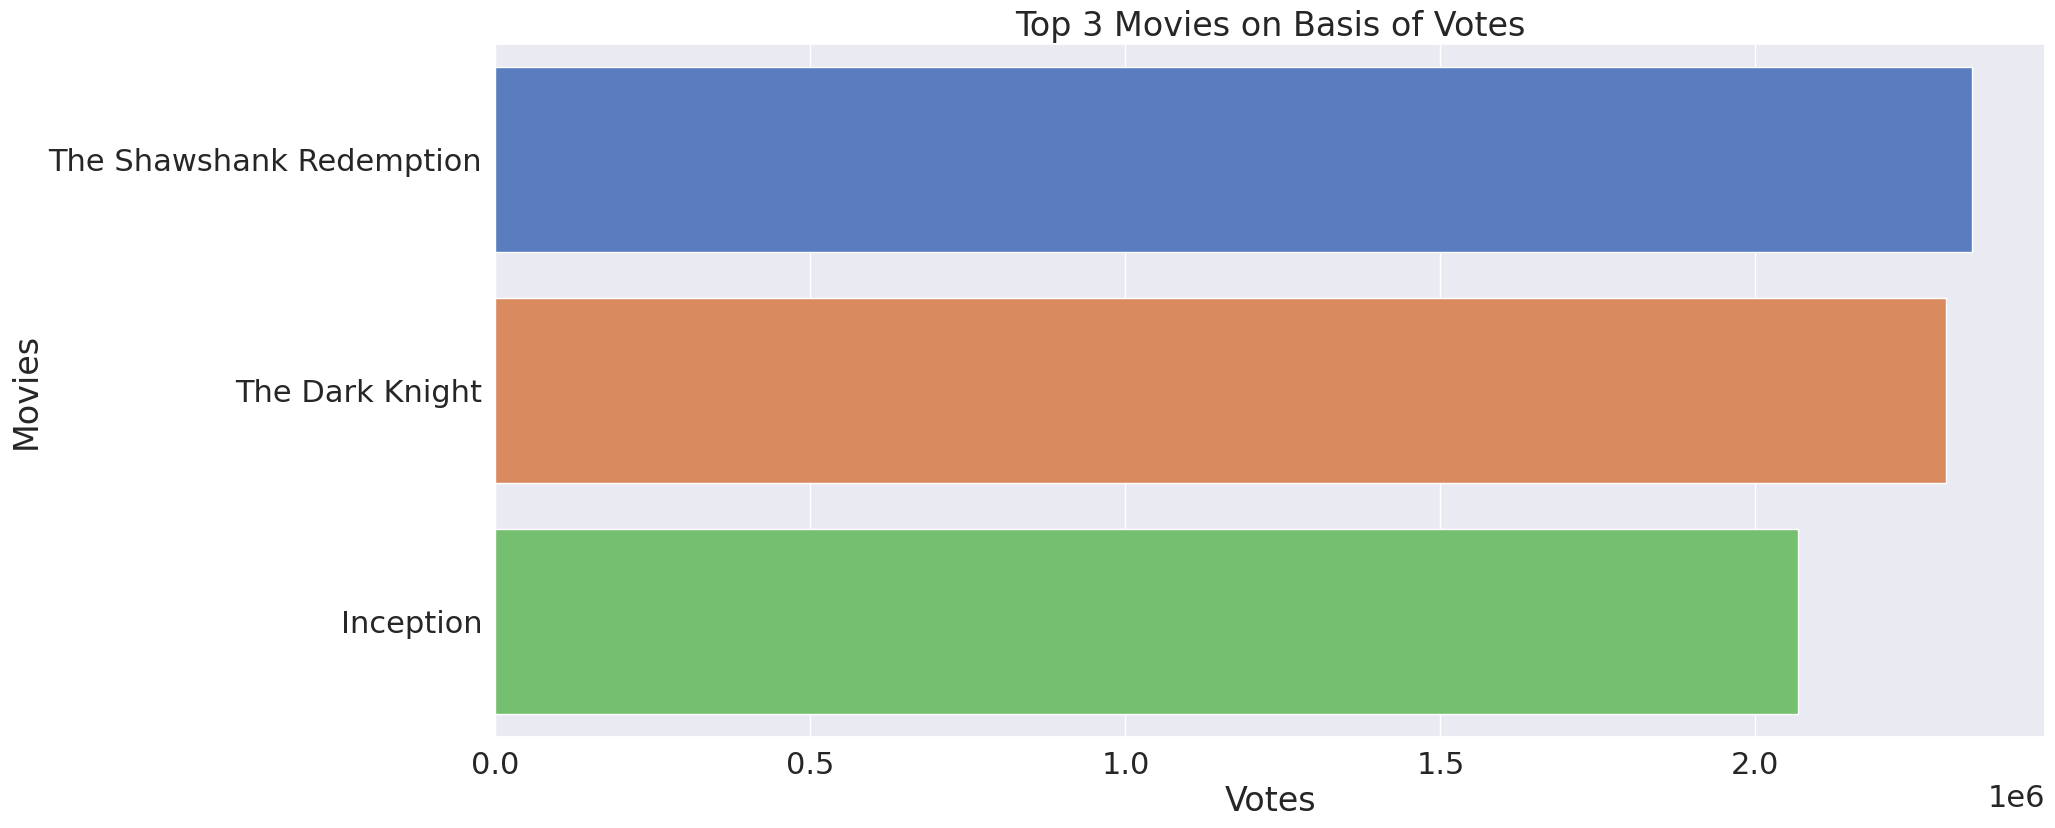

In [26]:
plt.figure(figsize=(20,9))
sns.set(font_scale = 2)
sns.barplot(x ="Votes" , y ="Series_Title", data = votes_movies,orient ='h',palette = "muted")
plt.title("Top 3 Movies on Basis of Votes")
plt.xlabel("Votes")
plt.ylabel("Movies")
plt.show()

In [27]:
data.head(1)

,Series_Title,Release Year,Age Rating,Runtime,Genre,IMDB Rating,Overview,Director,Star1,Star2,Star3,Star4,Votes,Gross Revenue
0,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28.341469


**d.Determine which Age group as the highest Votes ?**

In [28]:
rating_by_age=data.groupby('Age Rating')['Votes'].sum()
rating_by_age

Age Rating
A     112978860
U      61382018
UA     84463495
Name: Votes, dtype: int64

In [29]:
print("the highest Votes according the age group is",rating_by_age[:1])

the highest Votes according the age group is Age Rating
A    112978860
Name: Votes, dtype: int64
